#### 多维数据，只输出预测和真实值的对比图，损失函数特别大，但是最后的预测结果还可以。有点不明白请老师指点

In [71]:
import pandas as pd
import numpy as np

### 数据预处理：缩放大小避免超出可计算范围

In [72]:
data = pd.read_csv('usa_housing_price.csv')
X_multi = data.drop(['Price'], axis=1).values 
y = data['Price'].values

In [73]:
X_mean = np.mean(X_multi, axis=0)
X_std = np.std(X_multi, axis=0)
X_multi = (X_multi - X_mean) / X_std

### 添加矩阵运算截距项

In [74]:
X_multi = np.column_stack((np.ones(X_multi.shape[0]), X_multi))

### 初始化参数 beta，设为全零

In [75]:
beta = np.zeros(X_multi.shape[1])

In [76]:
learn_rate = 0.001
iterations = 50000 
m = len(y)  

### 梯度下降

In [77]:
#均方差
def loss_func(X, y, beta):
    y_pred = X @ beta
    loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return loss

In [78]:
def gradient_descent(X, y, beta, learn_rate, iterations):
    loss_history = []  #记录每次迭代的损失
    for i in range(iterations):
        y_pred = X @ beta #预测值
        #计算梯度
        gradient = (1 / m) * (X.T @ (y_pred - y))
        #更新参数
        beta = beta - learn_rate * gradient
        
        loss = loss_func(X, y, beta)
        loss_history.append(loss)
        if i % 1000 == 0:
            print(f"Iteration {i}: Loss = {loss}")
    return beta, loss_history

In [79]:
#优化参数 这里的均方损失有点恐怖啊没太明白为什么，可能是数据的原因
beta_optimal, loss_history = gradient_descent(X_multi, y, beta, learn_rate, iterations)

Iteration 0: Loss = 819690602969.5039
Iteration 1000: Loss = 115124740214.7407
Iteration 2000: Loss = 20500953355.456764
Iteration 3000: Loss = 7537093573.42139
Iteration 4000: Loss = 5668215542.068506
Iteration 5000: Loss = 5339589105.686738
Iteration 6000: Loss = 5244493164.732192
Iteration 7000: Loss = 5197652169.274051
Iteration 8000: Loss = 5168496469.169992
Iteration 9000: Loss = 5149223389.38753
Iteration 10000: Loss = 5136318331.393607
Iteration 11000: Loss = 5127654513.040994
Iteration 12000: Loss = 5121834959.522963
Iteration 13000: Loss = 5117925500.364803
Iteration 14000: Loss = 5115299147.170208
Iteration 15000: Loss = 5113534769.767689
Iteration 16000: Loss = 5112349464.459612
Iteration 17000: Loss = 5111553178.51558
Iteration 18000: Loss = 5111018235.051334
Iteration 19000: Loss = 5110658860.992074
Iteration 20000: Loss = 5110417434.1436405
Iteration 21000: Loss = 5110255244.019842
Iteration 22000: Loss = 5110146284.985542
Iteration 23000: Loss = 5110073086.501702
Iterat

In [80]:
print("优化后的回归系数 (beta)：", beta_optimal)

优化后的回归系数 (beta)： [1232072.65414518  230520.31581146 -164824.59941759  124441.8430324
  150187.95498538   -2955.61213832]


In [81]:
y_predict_multi = X_multi @ beta_optimal

In [82]:
#均方误差
error_multi = np.mean((y - y_predict_multi) ** 2)
print("均方误差：", error_multi)

均方误差： 10219846518.667963


### 绘制预测与实际值的散点图

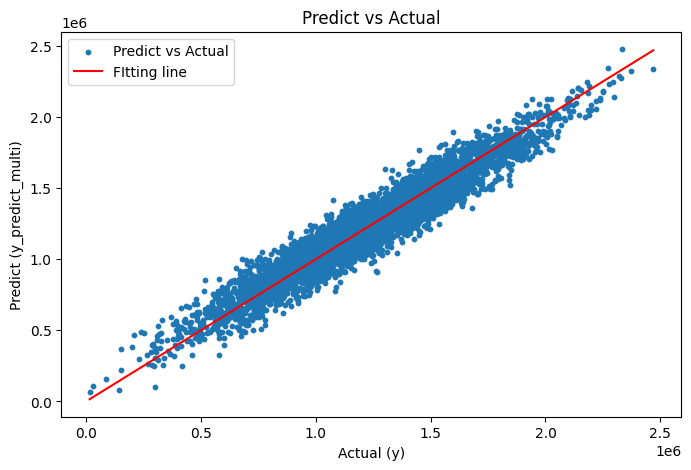

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y, y_predict_multi, s=10,label="Predict vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label="FItting line") 
plt.xlabel('Actual (y)')
plt.ylabel('Predict (y_predict_multi)')
plt.title('Predict vs Actual')
plt.legend()
plt.show()

### 预测新的数据点

In [84]:
X_test = [65000, 5, 5, 30000, 200]  
X_test = (X_test - X_mean) / X_std  #标准化
X_test = np.array([1] + list(X_test)).reshape(1, -1)  #添加偏置项并调整维度
y_test_predict = X_test @ beta_optimal

print("新数据点的预测结果：", y_test_predict)

新数据点的预测结果： [817061.86483804]
